This document: describes an 8 species Lotka-Volterra Systemvim 

In [62]:
alpha = repmat(0.01, 1, 8); # natural births and deaths

# community matrix, aka interaction coefficients at equilibrium
beta = [-0.025   0.002    0.002    0.002    0.002    0.002    0.002    0.002;
        -0.001  -0.02    -0.002    0.003    0.002    0.002    0.002    0.002;
        -0.001  -0.002   -0.02     0.002    0.002    0.003    0.002    0.002;
        -0.003  -0.002   -0.002   -0.001   -0.0001  -0.0001  -0.0001   0;
        -0.002  -0.003   -0.002   -0.0001  -0.001    0        0       -0.0001;
        -0.002  -0.002   -0.002   -0.0001   0       -0.001    0       -0.0001;
        -0.002  -0.002   -0.002   -0.0001   0        0       -0.001    0.0002;
        -0.002  -0.002   -0.003    0       -0.0001  -0.0001   0.0002  -0.001];


### Notes on this community matrix (assuming the system is in equilibrium):

In this simulation, $ n_1 $ is a super predator, and $ n_2, n_3 $ are mesopredators. The others are species of ecological concern for conservation. The superpredators prey on all species, but the meso predators don't prey on the superpredators.

All species are in competition with themselves. The competition for resources is very significant for the predators, especially for super predators.

$ n_7, n_8 $ have a symbiotic relationship but many of the prey species have no effect on each other. Most of them have a small negative effect on one another.

In [63]:
function dn = ecosystem(t, n, alpha, beta)
    dn = zeros(8,1);
    for i=1:8
        dn(i) = n(i)*(alpha(i) + dot(n,beta(i,:)));
    end
end

function visualise(t, solution, titleText)
    n1=solution(:,1);
    n2=solution(:,2);
    n3=solution(:,3);
    n4=solution(:,4);
    n5=solution(:,5);
    n6=solution(:,6);
    n7=solution(:,7);
    n8=solution(:,8); 
    
    graphics_toolkit("gnuplot");
    plot(t,n1,'--k');
    grid;
    hold on;
    plot(t,n2,'--r');
    plot(t,n3,'--b');
    plot(t,n4,'m');
    plot(t,n5,'c');
    plot(t,n6,'k');
    plot(t,n7,'r');
    plot(t,n8,'b');
    
    legend("n1 (superpredator)", "n2 (mesopredator)", "n3 (mesopredator)", "n4", "n5", "n6", "n7", "n8");
    xlabel("Year (monthly increments)");
    ylabel("population per sqkm");
    
    title(titleText);
    hold off;
    
end

warning('off','all');

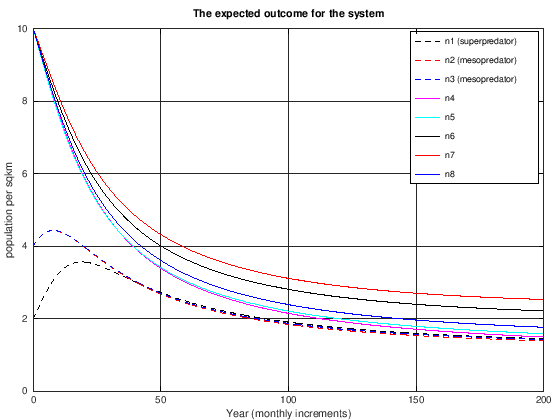

In [64]:
time_step=1/12; #approximately a month timestep
t0=[0:time_step:200]; #200 years
n0=[2 4 4 10 10 10 10 10]; # 2 super, 4 each meso, 10 each prey, per 1sqkm
[t,solution]=ode45(@ecosystem,t0,n0,alpha,beta);

visualise(t,solution,"The expected outcome for the system");

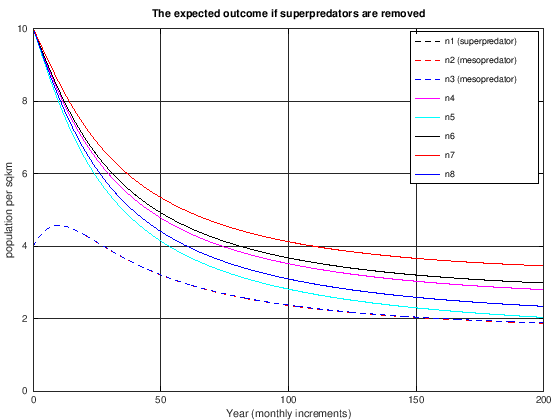

In [65]:
time_step=1/12; 
t0=[0:time_step:200]; 
n0=[0 4 4 10 10 10 10 10]; 
[t,solution]=ode45(@ecosystem,t0,n0,alpha,beta);

visualise(t,solution,"The expected outcome if superpredators are removed");

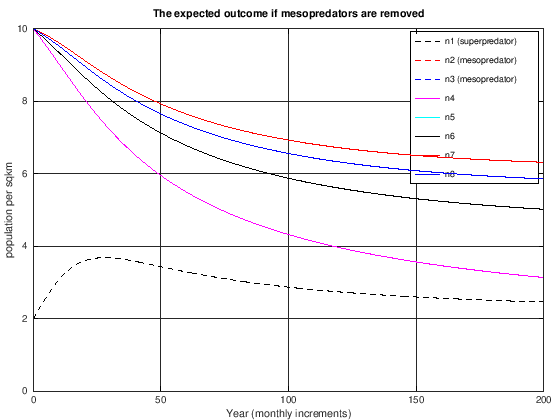

In [66]:
time_step=1/12; 
t0=[0:time_step:200]; 
n0=[2 0 0 10 10 10 10 10]; 
[t,solution]=ode45(@ecosystem,t0,n0,alpha,beta);

visualise(t,solution,"The expected outcome if mesopredators are removed");

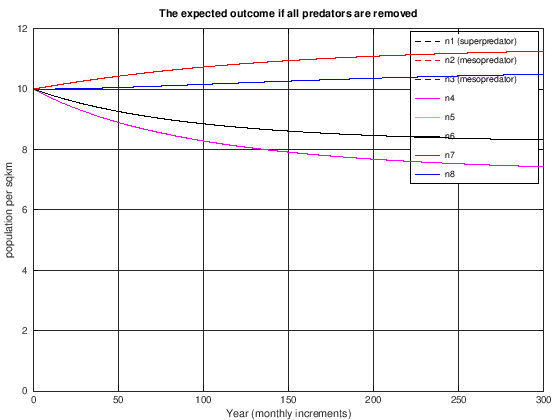

In [67]:
time_step=1/12; 
t0=[0:time_step:300];
n0=[0 0 0 10 10 10 10 10]; 
[t,solution]=ode45(@ecosystem,t0,n0,alpha,beta);

visualise(t,solution,"The expected outcome if all predators are removed");